Charles Rockhead (519, Pooja’s cohort), Anya Reddy (419, Pooja’s Cohort), Sam Hartman (419, Kyle’s cohort), Daniel Buttery (519 , Kyle’s cohort)

In [ ]:
!pip install kneed
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model
from keras.datasets import mnist

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import kneed
from kneed import KneeLocator
import cv2
import tensorflow as tf

In [2]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from keras.datasets import mnist
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers
from keras.optimizers import Adam
import tensorflow.keras.layers
from keras.models import Model
from keras.layers import Conv2D, Flatten, Lambda
from keras.layers import Reshape, Conv2DTranspose
from keras import backend as K
from keras.losses import binary_crossentropy
from numpy import reshape
import matplotlib.pyplot as plt
#(x_train, y_train), (x_test, y_test) = mnist.load_data() #numbers
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() #clothes
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

In [ ]:
import matplotlib.pyplot as plt
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [ ]:
#does all the work
data,autoencoder = preprocessing(x_test,train_x,val_x)
clusters = BestClusterNum(data)
kmeans = modeling(data,clusters)
generate_image(kmeans,clusters,autoencoder)

In [5]:
def preprocessing(data,train_x,val_x):
  data = data.astype('float32')
  data = data/255.0
  data = data.reshape(len(data),-1)
  encoder,autoencoder = autoEncoderModel(train_x,val_x)
  data_e = encoder.predict(data)
  return data,autoencoder

In [6]:
def autoEncoderModel(train_x,val_x):
  autoencoder = Sequential()
  autoencoder.add(Dense(512,  activation='elu', input_shape=(784,)))
  autoencoder.add(Dense(128,  activation='elu'))
  autoencoder.add(Dense(16,    activation='linear', name="bottleneck"))
  autoencoder.add(Dense(128,  activation='elu'))
  autoencoder.add(Dense(512,  activation='elu'))
  autoencoder.add(Dense(784,  activation='sigmoid'))
  autoencoder.compile(loss='mean_squared_error', optimizer = Adam())
  trained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=10, verbose=1, validation_data=(val_x, val_x))
  encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
  return encoder, autoencoder 

In [7]:
def modeling(data,clusters):
  #modeling
  kmeans = MiniBatchKMeans(n_clusters = clusters) #number of clusters, we can implement the elbow method later
  # Fitting the model to training set
  kmeans.fit(data)
  return kmeans

In [13]:
def BestClusterNum(data):
    '''plots SSE vs cluster size to determine best 
    '''

    sse = []
    list_k = list(range(3, 50))
    for k in list_k:
        km = KMeans(n_clusters=k, random_state=22, n_jobs=-1)
        km.fit(data)
    
        sse.append(km.inertia_)
    # Plot SSE against num clusters
    plt.figure(figsize=(6, 6))
    plt.plot(list_k, sse)
    plt.xlabel(r'Number of clusters *k*')
    plt.ylabel('Sum of squared distance within clusters')
    plt.show

    kn = KneeLocator(list_k, sse, curve='convex', direction='decreasing')
    return round(kn.knee, 0)

In [8]:
#image generation
def generate_image(kmeans,clusters,autoencoder):
  centroids = kmeans.cluster_centers_
  centroids_d = autoencoder.predict(centroids) 
  centroids_d = centroids_d.reshape(clusters,28,28)
  centroids_d = centroids_d * 255
  plt.figure(figsize = (10,9))
  bottom = 0.35
  for i in range(clusters):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.imshow(centroids_d[i])

Adding noise to our Vectorized Images

In [ ]:
def PoissonNoise(size, dim):
    '''returns a sizexsize or size x size x 3 np.array of noise sampled from Poisson distribution'''
    if(dim==2):
        ls = []
        for i in range(size):
            row = np.random.poisson(1, size)
            ls.append(row)
        arr = np.array(ls)
        return arr
    if(dim==3):
        ls = []
        for i in range(3*size):
            row = np.random.poisson(1, size)
            ls.append(row)
        arr = np.array(ls)
        arr = arr.reshape((size,size,3))
        return arr
    else:
        print("invalid dimension given")

In [ ]:
def ExponentialNoise(size, dim):
    '''returns a sizexsize or size x size x 3 np.array of noise sampled from Exponential distribution'''
    if(dim==2):
        ls = []
        for i in range(size):
            row = np.random.exponential(1, size)
            ls.append(row)
        arr = np.array(ls)
        return arr
    if(dim==3):
        ls = []
        for i in range(3*size):
            row = np.random.exponential(1, size)
            ls.append(row)
        arr = np.array(ls)
        arr = arr.reshape((size,size,3))
        return arr
    else:
        print("invalid dimension given")

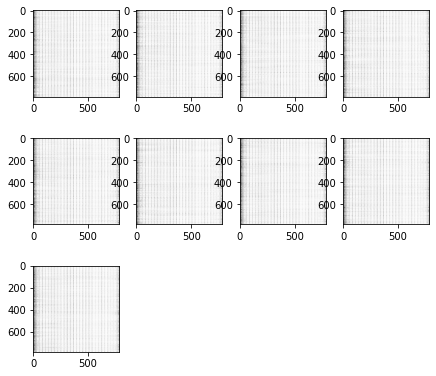

In [ ]:
predictions = []
for i in range(clusters):
    En = ExponentialNoise(784, 2)
    pred1 = autoencoder.predict(En)
    pred1 = pred1*255
    predictions.append(pred1)


bottom = 0.35
plt.figure(figsize = (10,9))
for i in range(clusters):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.imshow(predictions[i])




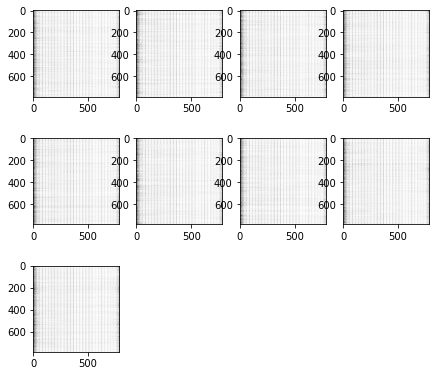

In [ ]:
predictions = []
for i in range(clusters):
    Pn = PoissonNoise(784, 2)
    pred = autoencoder.predict(Pn)
    pred = pred*255
    predictions.append(pred)


bottom = 0.35
plt.figure(figsize = (10,9))
for i in range(clusters):
    plt.subplots_adjust(bottom)
    plt.subplot(4,4,i+1)
    plt.imshow(predictions[i])


Variational AutoEncoder

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() #clothes
print(x_train.shape, x_test.shape)
x_train = np.reshape(x_train, (60000, 28, 28, 1))
x_test = np.reshape(x_test, (10000, 28, 28, 1))
print(x_train.shape, x_test.shape)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
def getEnc(params):
    mean, log_var = params
    std = K.exp(0.5 * log_var)
    epsilon = K.random_normal(shape=(K.shape(mean)[0], K.int_shape(mean)[1]))
    return mean + std * epsilon

In [ ]:
enc_input = Input(shape=(x_train.shape[1], x_train.shape[1], 1),)
enc = Conv2D(128,kernel_size=5, activation='relu', padding='same')(enc_input)
enc = tensorflow.keras.layers.MaxPooling2D((2,2))(enc)
enc = Conv2D(64,kernel_size=3, activation='relu', padding='same')(enc)
enc = tensorflow.keras.layers.MaxPooling2D((2,2))(enc)
enc = Conv2D(32, kernel_size=3, activation='relu', padding='same')(enc)
enc = Flatten()(enc)
enc = Dense(16, activation='relu')(enc)
log_var = Dense(6)(enc)
mean = Dense(6)(enc)
z = Lambda(getEnc, output_shape=(6,))([mean, log_var])
encoder = Model(enc_input, [mean, log_var, z])

In [ ]:
dec_input = Input(shape=(6,))
dec = Dense(7 * 7 * 32, activation='relu')(dec_input)
dec = Reshape((7, 7, 32))(dec)
dec = Conv2DTranspose(128, kernel_size=3, activation='relu', padding='same')(dec)
dec = Conv2DTranspose(64, kernel_size=3, activation='relu', padding='same')(dec)
dec = tensorflow.keras.layers.UpSampling2D((2,2))(dec)
dec = Conv2DTranspose(64, kernel_size=3, activation='relu', padding='same')(dec)
dec = tensorflow.keras.layers.UpSampling2D((2,2))(dec)
dec = Conv2DTranspose(1, kernel_size=5, activation='relu', padding='same')(dec)
decoder = Model(dec_input, dec)

In [ ]:
dec_output = decoder(encoder(enc_input)[2])

In [ ]:
vae = Model(enc_input, dec_output)
r_loss = tensorflow.reduce_mean(tensorflow.keras.losses.mse(K.flatten(enc_input), K.flatten(dec_output))) * 28 * 28
loss = -0.5 * K.sum((1 + log_var - K.square(mean) - K.exp(log_var)), axis=-1)
vae_loss = K.mean(r_loss + loss)

In [ ]:
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.fit(x_train,epochs=10,batch_size=64,shuffle=True,validation_data=(x_test,None))

In [ ]:
res = encoder.predict(x_test)
final_images = decoder.predict(res[0])
plt.figure(figsize=(20, 4))
for i in range(10):
	plt.gray()
	plt.subplot(2, 10, i+1)
	plt.imshow(x_test[i].reshape(28, 28))
	plt.subplot(2, 10, i + 1 + 10)
	plt.imshow(final_images[i].reshape(28, 28))
plt.show()

In [ ]:
figure = np.zeros((28 * 30, 28 * 30))
space = np.linspace(-8, 8, 30)
for i, x in enumerate(space):
    for i2, y in enumerate(space):
        generated_image = decoder.predict(np.array([[x, y, x, y, x, y]]))[0]
        figure[i*28:(i+1)*28, i2*28:(i2+1)*28,] = generated_image[:,:,-1]
  
plt.figure(figsize=(45, 45))
plt.imshow(figure, cmap='gray', extent=[8,-8,8,-8])
plt.show()